# Simplified Quantum Digital Signature (QDS) Simulation

This repository contains a simplified implementation of a quantum digital signature (QDS) using the Qiskit library. The purpose is to demonstrate how to generate and measure a quantum signature using different quantum encoding bases. The code illustrates fundamental QDS concepts, such as encoding bits in random quantum bases and the influence of the chosen basis on the fidelity of the signature.

The simulation follows these steps:

- Message and random bases generation:
A fixed-size message (in this example, 4 bits) is randomly generated. For each bit of the message, a quantum basis is also randomly chosen by the signer (the entity sending the signature). The possible bases are the computational basis (
∣0⟩ and ∣1⟩ and the Hadamard basis (∣+⟩ and ∣−⟩).

- Quantum encoding of the signature:
Each bit of the message is encoded in the corresponding quantum state according to the signer's chosen basis. If the bit is 1, the X gate is applied (flipping )
∣0⟩ to ∣1⟩. If the basis is Hadamard, the H gate is applied to place the qubit in superposition.

- Measurement of the signature by the recipient:
The recipient randomly chooses measurement bases for each qubit. If the measurement basis is Hadamard, the H gate is applied before measurement. All qubits are measured, and the results are stored in classical registers.

- Simulation and results:
The quantum circuit is executed on Qiskit's Aer simulator with multiple repetitions (shots) to gather statistics. The results show the correspondence between the states sent by the signer and the states measured by the recipient, allowing observation of how the choice of bases affects the signature.

- Visualization:
The code allows visualization of the quantum circuit in text format or color (using "mpl") and generates histograms showing the distribution of measurement outcomes.

Summary:
This simulation demonstrates the basic principles of a quantum digital signature:

* Encoding in random quantum bases ensures security and allows verification of the signature's authenticity.

* Measurement in different bases introduces uncertainty, reflecting fundamental properties of quantum mechanics.

* Using a quantum simulator allows testing and visualizing the system's behavior without requiring physical hardware.

Original Message:       [1, 0, 0, 1]
Signer Bases:           [1, 0, 1, 0]
Recipient Bases:        [1, 1, 1, 0]
Quantum Signature:        ['|->', '|0>', '|+>', '|1>']
Measurement Results:      {'1001': 560, '1011': 464}


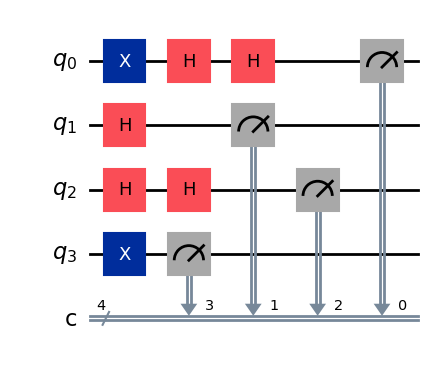

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import random

def random_bits(n):
    """Generates a list of n random bits."""
    return [random.randint(0, 1) for _ in range(n)]

def state_label(bit, base):
    """Returns the corresponding quantum state (the actual signature)."""
    if base == 0:  # computational basis
        return "|0>" if bit == 0 else "|1>"
    else:          # Hadamard basis
        return "|+>" if bit == 0 else "|->"

def prepare_signature(bits, bases):
    """
    Prepares the signature circuit.
    """
    n = len(bits)
    qreg = QuantumRegister(n, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)

    # Encode the bits in random bases
    for i in range(n):
        if bits[i] == 1:
            qc.x(i)
        if bases[i] == 1:
            qc.h(i)
    return qc

def measure_signature(qc, recipient_bases):
    """
    Measures the circuit in the bases chosen by the recipient.
    """
    n = qc.num_qubits
    meas_circ = qc.copy()
    for i in range(n):
        if recipient_bases[i] == 1:
            meas_circ.h(i)
    meas_circ.measure(range(n), range(n))
    return meas_circ

# --- Simulation ---
sim = AerSimulator()

# Example message (4 bits)
message = random_bits(4)
signature_bases = random_bits(len(message))  # signer's bases
recipient_bases = random_bits(len(message))  # recipient's bases

# Generate the "quantum signature"
signature_states = [state_label(m, b) for m, b in zip(message, signature_bases)]

# Create the signature circuit
qc_signature = prepare_signature(message, signature_bases)

# Create the measurement circuit
qc_measure = measure_signature(qc_signature, recipient_bases)

# Run the simulation
compiled = transpile(qc_measure, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

# --- Results ---
print("Original Message:      ", message)
print("Signer Bases:          ", signature_bases)
print("Recipient Bases:       ", recipient_bases)
print("Quantum Signature:       ", signature_states)
print("Measurement Results:     ", counts)

plot_histogram(counts)
plt.show()
qc_measure.draw(output="mpl")